In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import Dict, List
import pandas as pd

def load_metrics(filepath: str) -> Dict:
    """Load metrics from JSON file."""
    with open(filepath, 'r') as f:
        return json.load(f)

def compute_macro_metrics(per_class_metrics):
    """Compute macro-averaged precision and recall."""
    precisions = []
    recalls = []
    
    for class_metrics in per_class_metrics.values():
        precisions.append(class_metrics['precision'])
        recalls.append(class_metrics['recall'])
    
    macro_precision = np.mean(precisions)
    macro_recall = np.mean(recalls)
    
    return macro_precision, macro_recall

def plot_training_curves(family_metrics: List[Dict], group_metrics: List[Dict]):
    """Plot precision and recall curves over time."""
    epochs = range(len(family_metrics))
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot family classification metrics
    val_precisions = []
    val_recalls = []
    for metrics in family_metrics:
        precision, recall = compute_macro_metrics(metrics['val']['per_class'])
        val_precisions.append(precision)
        val_recalls.append(recall)
    
    ax1.plot(val_precisions, label='Macro Precision')
    ax1.plot(val_recalls, label='Macro Recall')
    ax1.set_title('Family Classification Performance')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Score')
    ax1.legend()
    ax1.grid(True)
    
    # Plot group classification metrics
    if group_metrics:
        val_precisions_g = []
        val_recalls_g = []
        for metrics in group_metrics:
            precision, recall = compute_macro_metrics(metrics['val']['per_class'])
            val_precisions_g.append(precision)
            val_recalls_g.append(recall)
        
        ax2.plot(val_precisions_g, label='Macro Precision')
        ax2.plot(val_recalls_g, label='Macro Recall')
    
    ax2.set_title('Group Classification Performance')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Score')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('precision_recall_curves.png')
    plt.close()

def plot_per_class_metrics(metrics: Dict, title: str, output_file: str):
    """Plot per-class precision and recall."""
    per_class = metrics['val']['per_class']
    classes = sorted(list(per_class.keys()))
    
    # Extract metrics
    precisions = [per_class[c]['precision'] for c in classes]
    recalls = [per_class[c]['recall'] for c in classes]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(classes))
    width = 0.35
    
    # Create bars
    ax.bar(x - width/2, precisions, width, label='Precision')
    ax.bar(x + width/2, recalls, width, label='Recall')
    
    # Customize plot
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

def plot_precision_recall_heatmap(metrics: Dict, title: str, output_file: str):
    """Create heatmap of precision and recall per class."""
    per_class = metrics['val']['per_class']
    classes = sorted(list(per_class.keys()))
    
    # Create DataFrame for heatmap
    data = []
    for class_id in classes:
        metrics = per_class[class_id]
        data.append([
            metrics['precision'],
            metrics['recall']
        ])
    
    df = pd.DataFrame(data, index=classes, columns=['Precision', 'Recall'])
    
    # Plot heatmap
    plt.figure(figsize=(10, len(classes)*0.4 + 2))
    sns.heatmap(df, annot=True, fmt='.3f', cmap='YlOrRd', center=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

def main():
    try:
        # Load metrics
        family_metrics = load_metrics('/data/saranyav/gcn_new/family_metrics.json')
        group_metrics = load_metrics('/data/saranyav/gcn_new/group_metrics.json')
        
        # Plot training curves
        plot_training_curves(family_metrics, group_metrics)
        
        # Get final epoch metrics
        final_family = family_metrics[-1]
        final_group = group_metrics[-1]
        
        # Plot per-class metrics for the last epoch
        plot_per_class_metrics(final_family, 
                             'Family Classification - Per-Class Precision and Recall',
                             'family_per_class_pr.png')
        
        plot_per_class_metrics(final_group,
                             'Group Classification - Per-Class Precision and Recall',
                             'group_per_class_pr.png')
        
        # Plot precision-recall heatmaps
        plot_precision_recall_heatmap(final_family,
                                    'Family Classification - Precision-Recall Heatmap',
                                    'family_pr_heatmap.png')
        
        plot_precision_recall_heatmap(final_group,
                                    'Group Classification - Precision-Recall Heatmap',
                                    'group_pr_heatmap.png')
        
        # Print final metrics
        print("\nFinal Metrics:")
        
        # Family classification
        print("\nFamily Classification:")
        macro_p, macro_r = compute_macro_metrics(final_family['val']['per_class'])
        print(f"Macro Precision: {macro_p:.4f}")
        print(f"Macro Recall: {macro_r:.4f}")
        
        print("\nPer-Class Performance:")
        for class_id, metrics in final_family['val']['per_class'].items():
            print(f"\nClass {class_id}:")
            print(f"Precision: {metrics['precision']:.4f}")
            print(f"Recall: {metrics['recall']:.4f}")
            print(f"Support: {metrics['support']}")
        
        # Group classification
        print("\nGroup Classification:")
        macro_p, macro_r = compute_macro_metrics(final_group['val']['per_class'])
        print(f"Macro Precision: {macro_p:.4f}")
        print(f"Macro Recall: {macro_r:.4f}")
        
        print("\nPer-Class Performance:")
        for class_id, metrics in final_group['val']['per_class'].items():
            print(f"\nClass {class_id}:")
            print(f"Precision: {metrics['precision']:.4f}")
            print(f"Recall: {metrics['recall']:.4f}")
            print(f"Support: {metrics['support']}")
        
    except Exception as e:
        print(f"Error in main: {str(e)}")
        raise e

if __name__ == "__main__":
    main()


Final Metrics:

Family Classification:
Macro Precision: 0.0011
Macro Recall: 0.0032

Per-Class Performance:

Class 0:
Precision: 0.0000
Recall: 0.0000
Support: 201

Class 1:
Precision: 0.0000
Recall: 0.0000
Support: 274

Class 2:
Precision: 0.0000
Recall: 0.0000
Support: 52

Class 3:
Precision: 0.0000
Recall: 0.0000
Support: 4

Class 4:
Precision: 0.0000
Recall: 0.0000
Support: 9

Class 5:
Precision: 0.0000
Recall: 0.0000
Support: 0

Class 6:
Precision: 0.0000
Recall: 0.0000
Support: 5

Class 7:
Precision: 0.0000
Recall: 0.0000
Support: 0

Class 8:
Precision: 0.0000
Recall: 0.0000
Support: 1

Class 9:
Precision: 0.0000
Recall: 0.0000
Support: 384

Class 10:
Precision: 0.0000
Recall: 0.0000
Support: 177

Class 11:
Precision: 0.0000
Recall: 0.0000
Support: 6

Class 12:
Precision: 0.0000
Recall: 0.0000
Support: 0

Class 13:
Precision: 0.0000
Recall: 0.0000
Support: 46

Class 14:
Precision: 0.0000
Recall: 0.0000
Support: 7

Class 15:
Precision: 0.0000
Recall: 0.0000
Support: 0

Class 16:


In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load metrics
with open('/data/saranyav/gcn_new/family_metrics.json', 'r') as f:
    family_metrics = json.load(f)
    
with open('/data/saranyav/gcn_new/group_metrics.json', 'r') as f:
    group_metrics = json.load(f)

# Extract epochs
epochs = range(len(family_metrics))

# Create a figure with subplots - 2 rows, 4 columns
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 10))

# Family Classification Plots (Top Row)
# Plot 1: Training Loss
train_loss = [m['train']['loss'] for m in family_metrics]
ax1.plot(epochs, train_loss, 'b-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Family Training Loss')
ax1.grid(True)

# Plot 2: Per-Class Precision
for class_id in family_metrics[0]['val']['per_class'].keys():
    precision_values = [m['val']['per_class'][class_id]['precision'] for m in family_metrics]
    ax2.plot(epochs, precision_values, label=f'Class {class_id}')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Precision')
ax2.set_title('Family Per-Class Precision')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

# Plot 3: Per-Class Recall
for class_id in family_metrics[0]['val']['per_class'].keys():
    recall_values = [m['val']['per_class'][class_id]['recall'] for m in family_metrics]
    ax3.plot(epochs, recall_values, label=f'Class {class_id}')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Recall')
ax3.set_title('Family Per-Class Recall')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True)

# Plot 4: Macro Precision/Recall
family_macro_precision = []
family_macro_recall = []
for metrics in family_metrics:
    precisions = [m['precision'] for m in metrics['val']['per_class'].values()]
    recalls = [m['recall'] for m in metrics['val']['per_class'].values()]
    family_macro_precision.append(np.mean(precisions))
    family_macro_recall.append(np.mean(recalls))

ax4.plot(epochs, family_macro_precision, 'g-', label='Macro Precision')
ax4.plot(epochs, family_macro_recall, 'b-', label='Macro Recall')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Score')
ax4.set_title('Family Macro Metrics')
ax4.legend()
ax4.grid(True)

# Group Classification Plots (Bottom Row)
# Plot 5: Training Loss
group_loss = [m['train']['loss'] for m in group_metrics]
ax5.plot(epochs, group_loss, 'r-')
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Loss')
ax5.set_title('Group Training Loss')
ax5.grid(True)

# Plot 6: Per-Class Precision
for class_id in group_metrics[0]['val']['per_class'].keys():
    precision_values = [m['val']['per_class'][class_id]['precision'] for m in group_metrics]
    ax6.plot(epochs, precision_values, label=f'Class {class_id}')
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Precision')
ax6.set_title('Group Per-Class Precision')
ax6.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax6.grid(True)

# Plot 7: Per-Class Recall
for class_id in group_metrics[0]['val']['per_class'].keys():
    recall_values = [m['val']['per_class'][class_id]['recall'] for m in group_metrics]
    ax7.plot(epochs, recall_values, label=f'Class {class_id}')
ax7.set_xlabel('Epoch')
ax7.set_ylabel('Recall')
ax7.set_title('Group Per-Class Recall')
ax7.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax7.grid(True)

# Plot 8: Macro Precision/Recall
group_macro_precision = []
group_macro_recall = []
for metrics in group_metrics:
    precisions = [m['precision'] for m in metrics['val']['per_class'].values()]
    recalls = [m['recall'] for m in metrics['val']['per_class'].values()]
    group_macro_precision.append(np.mean(precisions))
    group_macro_recall.append(np.mean(recalls))

ax8.plot(epochs, group_macro_precision, 'g-', label='Macro Precision')
ax8.plot(epochs, group_macro_recall, 'b-', label='Macro Recall')
ax8.set_xlabel('Epoch')
ax8.set_ylabel('Score')
ax8.set_title('Group Macro Metrics')
ax8.legend()
ax8.grid(True)

plt.tight_layout()
plt.show()

# Print final metrics for both classifiers
print("\nFamily Classification Final Metrics:")
final_family = family_metrics[-1]
print(f"Training Loss: {final_family['train']['loss']:.4f}")
print(f"Macro Precision: {family_macro_precision[-1]:.4f}")
print(f"Macro Recall: {family_macro_recall[-1]:.4f}")

print("\nGroup Classification Final Metrics:")
final_group = group_metrics[-1]
print(f"Training Loss: {final_group['train']['loss']:.4f}")
print(f"Macro Precision: {group_macro_precision[-1]:.4f}")
print(f"Macro Recall: {group_macro_recall[-1]:.4f}")

# Print per-class metrics for last epoch
print("\nPer-Class Final Metrics:")
print("\nFamily Classification:")
for class_id, metrics in final_family['val']['per_class'].items():
    print(f"\nClass {class_id}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"Support: {metrics['support']}")

print("\nGroup Classification:")
for class_id, metrics in final_group['val']['per_class'].items():
    print(f"\nClass {class_id}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"Support: {metrics['support']}")

/tmp/ipykernel_91815/1740750794.py:68: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


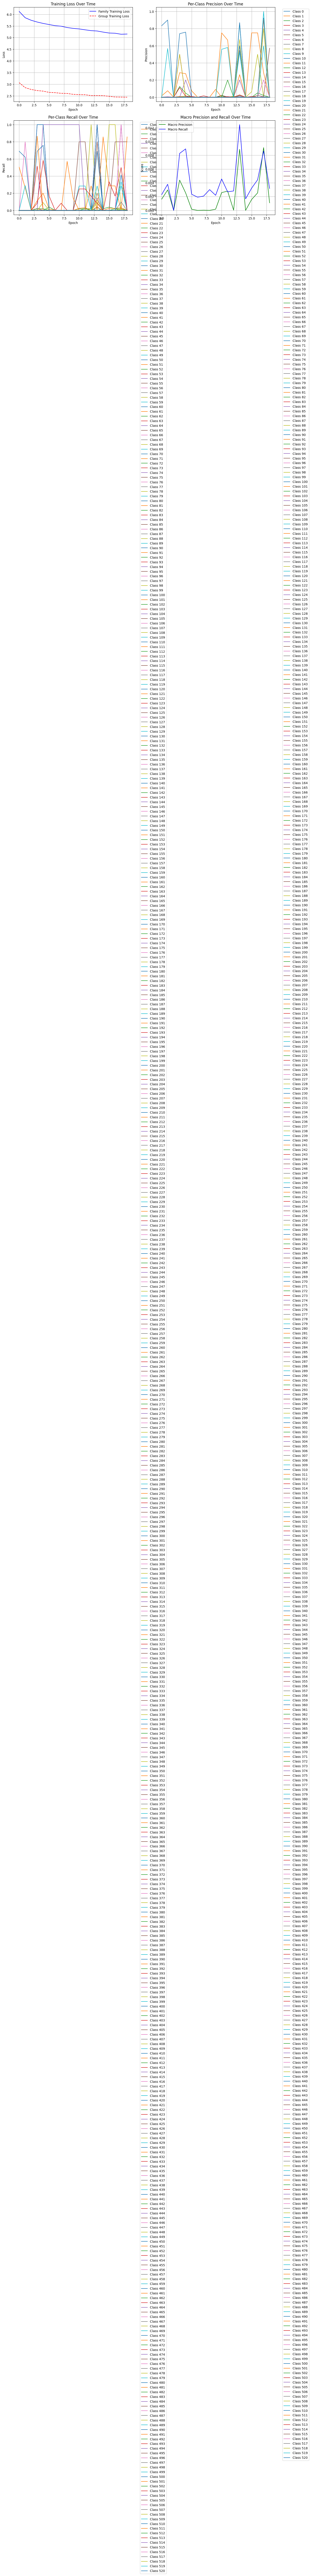


Final Epoch Metrics:
Training Loss: 5.1533

Per-Class Final Metrics:

Class 0:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 201

Class 1:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 274

Class 2:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 52

Class 3:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 4

Class 4:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 9

Class 5:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 0

Class 6:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 5

Class 7:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 0

Class 8:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 1

Class 9:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 384

Class 10:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 177

Class 11:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 6

Class 12:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 0

Class 13:
Precision: 0.0000
Recall: 0.0000
F1: 0.0000
Support: 46

Class

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load metrics
with open('/data/saranyav/gcn_new/family_metrics.json', 'r') as f:
    family_metrics = json.load(f)
    
with open('/data/saranyav/gcn_new/group_metrics.json', 'r') as f:
    group_metrics = json.load(f)

# Extract epochs
epochs = range(len(family_metrics))

# Create a figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Training Loss vs Epoch
train_loss = [m['train']['loss'] for m in family_metrics]
ax1.plot(epochs, train_loss, 'b-', label='Family Training Loss')
if group_metrics:
    group_loss = [m['train']['loss'] for m in group_metrics]
    ax1.plot(epochs, group_loss, 'r--', label='Group Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot 2: Precision vs Epoch for each class
for class_id in family_metrics[0]['val']['per_class'].keys():
    precision_values = [m['val']['per_class'][class_id]['precision'] for m in family_metrics]
    ax2.plot(epochs, precision_values, label=f'Class {class_id}')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Precision')
ax2.set_title('Per-Class Precision Over Time')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

# Plot 3: Recall vs Epoch for each class
for class_id in family_metrics[0]['val']['per_class'].keys():
    recall_values = [m['val']['per_class'][class_id]['recall'] for m in family_metrics]
    ax3.plot(epochs, recall_values, label=f'Class {class_id}')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Recall')
ax3.set_title('Per-Class Recall Over Time')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True)

# Plot 4: Macro Precision/Recall vs Epoch
macro_precision = []
macro_recall = []
for metrics in family_metrics:
    precisions = [m['precision'] for m in metrics['val']['per_class'].values()]
    recalls = [m['recall'] for m in metrics['val']['per_class'].values()]
    macro_precision.append(np.mean(precisions))
    macro_recall.append(np.mean(recalls))

ax4.plot(epochs, macro_precision, 'g-', label='Macro Precision')
ax4.plot(epochs, macro_recall, 'b-', label='Macro Recall')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Score')
ax4.set_title('Macro Precision and Recall Over Time')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

# Print final epoch metrics
final_epoch = family_metrics[-1]
print("\nFinal Epoch Metrics:")
print(f"Training Loss: {final_epoch['train']['loss']:.4f}")
print("\nPer-Class Final Metrics:")
for class_id, metrics in final_epoch['val']['per_class'].items():
    print(f"\nClass {class_id}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1: {metrics['f1']:.4f}")
    print(f"Support: {metrics['support']}")

print("\nFinal Macro Metrics:")
print(f"Macro Precision: {macro_precision[-1]:.4f}")
print(f"Macro Recall: {macro_recall[-1]:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import numpy as np
from pathlib import Path

def load_results(baseline_path: str, method_path: str):
    with open(baseline_path) as f:
        baseline_results = json.load(f)
    with open(method_path) as f:
        method_results = json.load(f)
    return baseline_results, method_results

def set_style():
    plt.style.use('seaborn')
    colors = sns.color_palette("husl", 4)
    sns.set_palette(colors)
    return colors

def plot_performance_comparison(baseline_results, method_results, colors):
    methods_data = []
    
    # Baseline metrics
    methods_data.extend([
        {
            'Method': 'Traditional GNN',
            'Type': 'Baseline',
            'Precision': baseline_results['baseline_gnn']['overall']['precision'],
            'Recall': baseline_results['baseline_gnn']['overall']['recall'],
            'F1': baseline_results['baseline_gnn']['overall']['f1']
        },
        {
            'Method': 'Random Forest',
            'Type': 'Baseline',
            'Precision': baseline_results['random_forest']['overall']['precision'],
            'Recall': baseline_results['random_forest']['overall']['recall'],
            'F1': baseline_results['random_forest']['overall']['f1']
        }
    ])
    
    # Our method metrics
    test_results = method_results['test_results']
    methods_data.extend([
        {
            'Method': 'Family-Level',
            'Type': 'Temporal-Symbolic Model',
            'Precision': test_results['family']['metrics']['overall']['precision'],
            'Recall': test_results['family']['metrics']['overall']['recall'],
            'F1': test_results['family']['metrics']['overall']['f1']
        },
        {
            'Method': 'Group-Level',
            'Type': 'Temporal-Symbolic Model',
            'Precision': test_results['group']['metrics']['overall']['precision'],
            'Recall': test_results['group']['metrics']['overall']['recall'],
            'F1': test_results['group']['metrics']['overall']['f1']
        }
    ])
    
    df = pd.DataFrame(methods_data)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.25
    opacity = 0.8
    
    index = np.arange(len(df['Method'].unique()))
    
    metrics = ['Precision', 'Recall', 'F1']
    for i, metric in enumerate(metrics):
        plt.bar(index + i*bar_width, 
                df[metric], 
                bar_width,
                alpha=opacity,
                color=colors[i],
                label=metric)
    
    plt.xlabel('Methods')
    plt.ylabel('Score')
    plt.title('Performance Comparison: Baselines vs Temporal-Symbolic Model')
    plt.xticks(index + bar_width, df['Method'], rotation=45)
    
    # Add type labels
    for i, method in enumerate(df['Method']):
        type_label = df[df['Method'] == method]['Type'].iloc[0]
        plt.text(i, -0.05, type_label, 
                rotation=45, ha='right', va='top', 
                transform=ax.get_xaxis_transform())
    
    plt.legend()
    plt.tight_layout()
    plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

def plot_novel_detection(baseline_results, method_results, colors):
    methods_data = []
    
    # Baseline novel detection
    for method in ['isolation_forest', 'one_class_svm']:
        methods_data.append({
            'Method': method.replace('_', ' ').title(),
            'Type': 'Baseline',
            'Precision': baseline_results[method]['precision'],
            'Recall': baseline_results[method]['recall'],
            'F1': baseline_results[method]['f1']
        })
    
    # Our method novel detection
    test_results = method_results['test_results']
    for model in ['family', 'group']:
        methods_data.append({
            'Method': f'{model.title()}-Level',
            'Type': 'Temporal-Symbolic Model',
            'Precision': test_results[model]['novel_detection']['overall']['precision'],
            'Recall': test_results[model]['novel_detection']['overall']['recall'],
            'F1': test_results[model]['novel_detection']['overall']['f1']
        })
    
    df = pd.DataFrame(methods_data)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=pd.melt(df, 
                            id_vars=['Method', 'Type'], 
                            var_name='Metric', 
                            value_name='Score'),
                x='Method', y='Score', hue='Metric', palette=colors[:3])
    
    plt.xticks(rotation=45)
    plt.title('Novel Detection Performance')
    
    # Add type labels
    ax = plt.gca()
    for i, method in enumerate(df['Method']):
        type_label = df[df['Method'] == method]['Type'].iloc[0]
        plt.text(i, -0.05, type_label, 
                rotation=45, ha='right', va='top', 
                transform=ax.get_xaxis_transform())
    
    plt.tight_layout()
    plt.savefig('novel_detection_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()

def plot_training_history(method_results):
    history = method_results['training_history']
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    for model_type in ['family', 'group']:
        metrics = pd.DataFrame([{
            'epoch': data['epoch'],
            'train_acc': data['train']['accuracy'],
            'train_loss': data['train']['loss'],
            'val_acc': np.mean([m['recall'] for m in data['val']['per_class'].values() 
                              if isinstance(m, dict) and m['support'] > 0])
        } for data in history[model_type]])
        
        ax = ax1 if model_type == 'family' else ax2
        title = f"{model_type.title()}-Level Training"
        
        # Plot accuracy and loss
        ax.plot(metrics['epoch'], metrics['train_acc'], label='Train Accuracy')
        ax.plot(metrics['epoch'], metrics['val_acc'], label='Validation Accuracy')
        ax2 = ax.twinx()  # Create second y-axis
        ax2.plot(metrics['epoch'], metrics['train_loss'], 'r--', label='Train Loss')
        
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax2.set_ylabel('Loss')
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines1 + lines2, labels1 + labels2)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300)
    plt.close()

def plot_group_distribution(method_results):
    data_stats = method_results['data_statistics']['test']['group']
    
    # Convert counts to DataFrame
    df = pd.DataFrame([
        {'group': group, 'count': count}
        for group, count in data_stats['known_groups'].items()
    ])
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='group', y='count')
    plt.title('Behavioral Group Distribution')
    plt.xlabel('Group ID')
    plt.ylabel('Sample Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('group_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    colors = set_style()

    baseline_results, method_results = load_results('/data/saranyav/gcn_new/baseline_results.json', '/data/saranyav/gcn_new/final_report.json')
    # Generate all plots
    plot_performance_comparison(baseline_results, method_results, colors)
    plot_novel_detection(baseline_results, method_results, colors)
    plot_training_history(method_results)
    plot_group_distribution(method_results)